In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [120]:
# i0 = 1.2 * (10**-3)
i0 = 2.55
alpha = 2
F = 96485
R = 8.314
T = 298.15

# OV = -0.0254
#Ciref = 10**-3
CO = 0.26 #mol/m3
CR = (10**-4)
# Ciref = 1 
# Eeq = 0.203 - ((R*T)/(n*F))*np.log(CR/CO)
Eeq = 0.203 
# Ect = np.array([-1.1,-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9,1.1])
Ect = -1.1 + 1.1553
OV = -0.075
# OV = Ect-Eeq
CO
# (alpha*F*OV)/(R*T)
#Ciref
step = 2*60 #2 minutes
time_step = np.arange(0,0.5*60*60,step)
# time_step
concO2 = np.array([0.26])
concOH = np.array([10**-4])
O2_limit = 10**-20

In [121]:
for i,t in enumerate(time_step):
    if i == len(time_step) - 1:
        break
    
    # Make this a function
    iloc = i0*((concOH[i]*np.exp((alpha*F*OV)/(R*T))) - (concO2[i]*np.exp((-(alpha)*F*OV)/(R*T))))
    RO2 = -1*abs(iloc)/(F*4) #Rate of O2 consumption
    ROH = 4*abs(iloc)/(F*4) #Rate of OH production

    #Concentration of oxygen
    new_concO2 = (RO2*step) + concO2[i]
    if new_concO2 <= O2_limit:
        concO2 = np.append(concO2, O2_limit)
        new_concOH = max(concOH) #Calculate the New conc of OH based on O2_limit
        concOH = np.append(concOH, new_concOH)
    else:
        concO2 = np.append(concO2, new_concO2)

        #Concentration of hydroxide
        new_concOH = (ROH*step) + concOH[i]
        concOH = np.append(concOH, new_concOH)
    

In [123]:

concOH


array([1.00000000e-04, 2.83168900e-01, 4.89189029e-01, 6.39132359e-01,
       7.48262483e-01, 8.27688383e-01, 8.85495277e-01, 9.27567663e-01,
       9.58188329e-01, 9.80474329e-01, 9.96694284e-01, 1.00849931e+00,
       1.01709112e+00, 1.02334432e+00, 1.02789545e+00])

In [64]:
iloc = i0*((CR*np.exp((alpha*F*OV)/(R*T))) - (CO*np.exp((-(alpha)*F*OV)/(R*T))))
iloc = iloc*0.0104
iloc

-2.36703157908976

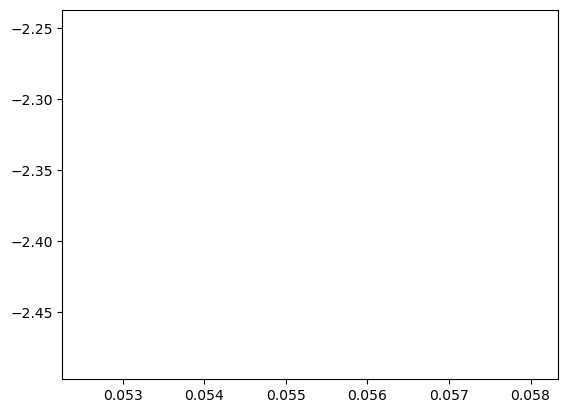

In [65]:
plt.plot(Ect,iloc)

In [61]:
Rate = -1*abs(iloc)/(F*4)
Rate

-0.0005897268754135159

In [63]:
Cii = (Rate*100) + CO
Cii

0.2010273124586484

In [46]:
RateOH = 4*abs(iloc)/(F*4)

COHi = (RateOH*7200) + CR
COHi

0.17673499372385626

In [115]:
iloc

-4083.382860701368